<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="250" align="center">

**CEIA - MODELO GRANDE DE LENGUAJE (LLM) E IA GENERATIVA**

*TF - DETECCIÓN DE FAKE NEWS - ING. JUAN I. MUNAR*


Esta es la primera de dos notebooks que forman parte de la entrega del trabajo final de la materia Modelo grande de lenguaje (LLM) e IA generativa. El trabajo se dividió en dos partes para independizar el preprocesamiento de los datos por un lado, y el entrenamiento y validación del modelo por otro.

*PARTE (1 de 2): PREPROCESAMIENTO DE LOS DATOS*

In [1]:
# Montar el colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Librerías

# Datos Python
import pandas as pd

# Split
from sklearn.model_selection import train_test_split

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Importar el Dataset, parte real
df_real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LLM/Dataset/True.csv')
df_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [4]:
# Información de parte real
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
# Descripción parte real
df_real.describe(include=['object'])

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
# Eliminar duplicados
df_real = df_real.drop_duplicates(subset='text', keep='first')
df_real = df_real.drop_duplicates(subset='title', keep='first')

In [7]:
# Importar el Dataset, parte falsa
df_falso = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LLM/Dataset/Fake.csv')
df_falso.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [8]:
# Información de parte falsa
df_falso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
# Descripción parte falsa
df_falso.describe(include=['object'])

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [10]:
# Eliminar duplicados.
df_falso = df_falso.drop_duplicates(subset='text', keep='first')
df_falso = df_falso.drop_duplicates(subset='title', keep='first')

In [11]:
# Agregar dos columnas referentes a true - fake.
df_real['true'] = 1
df_real['label'] = 'True'
df_falso['true'] = 0
df_falso['label'] = 'Fake'

In [12]:
# Unir en un solo df.
df = pd.concat([df_real, df_falso], ignore_index=True)

In [13]:

# Observar la longitud de los textos.
df_real['text_length'] = df_real['text'].apply(len)
df_falso['text_length'] = df_falso['text'].apply(len)

In [14]:
# En números:
df_real['text_length'].describe()

count    20821.000000
mean      2368.044378
std       1666.874381
min          1.000000
25%        914.000000
50%       2214.000000
75%       3204.000000
max      29781.000000
Name: text_length, dtype: float64

In [15]:
# En números:
df_falso['text_length'].describe()

count    17450.000000
mean      2548.981261
std       2199.334690
min          1.000000
25%       1649.000000
50%       2234.500000
75%       3005.000000
max      51794.000000
Name: text_length, dtype: float64

In [16]:
# Trunco las colas.
df_real = df_real[df_real['text_length'] <= 8000]
df_falso = df_falso[df_falso['text_length'] <= 8000]

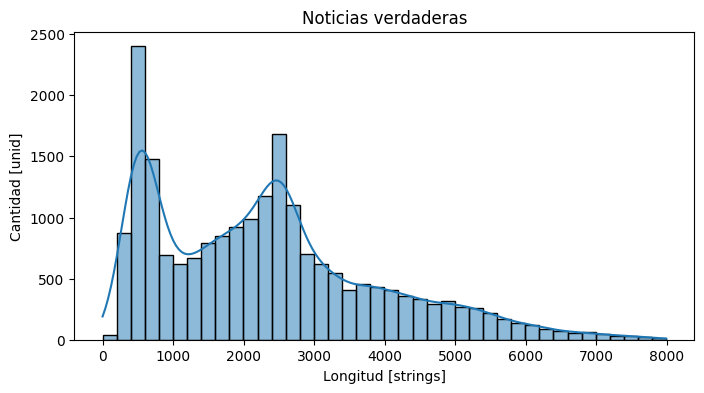

In [17]:
# Plot
plt.figure(figsize=(8, 4))
sns.histplot(df_real['text_length'], kde=True, bins=40)
plt.title('Noticias verdaderas')
plt.xlabel('Longitud [strings]')
plt.ylabel('Cantidad [unid]')
plt.show()

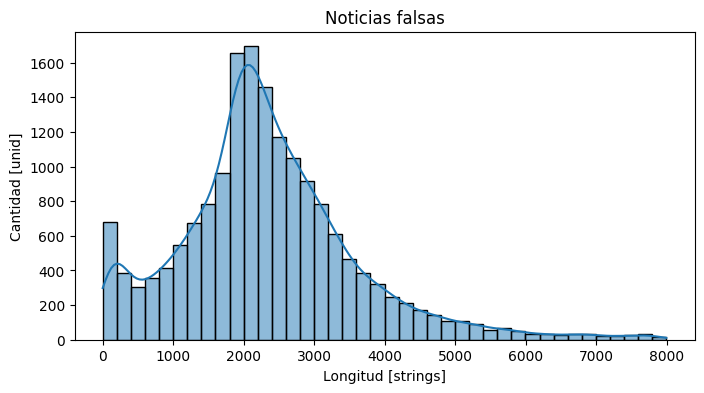

In [18]:
# Plot
plt.figure(figsize=(8, 4))
sns.histplot(df_falso['text_length'], kde=True, bins=40)
plt.title('Noticias falsas')
plt.xlabel('Longitud [strings]')
plt.ylabel('Cantidad [unid]')
plt.show()

In [19]:
# Dada la gran cantidad de datos, se elimina parte del registro para balancear.
df_real = df_real.sample(n=len(df_falso), random_state=1)

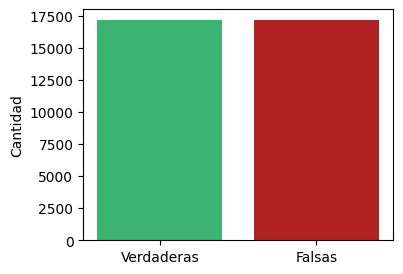

In [20]:
# Plot del balance.
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(
    ['Verdaderas', 'Falsas'],
    [len(df_real), len(df_falso)],
    color=['mediumseagreen', 'firebrick']
    )
# Añadir etiquetas y título.
ax.set_ylabel('Cantidad')

# Mostrar el gráfico.
plt.show()

In [21]:
# Por excesivos tiempos de ejecución, se reduce el tamaño del set
df_real = df_real.iloc[0:2500]
df_falso = df_falso.iloc[0:2500]

In [22]:
# Repasar columnas para seleccionar features
df_real.columns

Index(['title', 'text', 'subject', 'date', 'true', 'label', 'text_length'], dtype='object')

In [23]:
# Limpieza antes del split.
# En este punto se puede unir con el título.
# Acá también se puede elegir considerar el label como str o int ('true').

df_real.drop(['title', 'subject', 'date', 'label', 'text_length'],
             axis=1,
             inplace=True)
df_falso.drop(['title', 'subject', 'date', 'label', 'text_length'],
              axis=1,
              inplace=True)

In [24]:
# Dividir en 80/20 cada conjunto de datos.
train_true, test_true = train_test_split(df_real,
                                        train_size=0.8,
                                        random_state=42)
train_fake, test_fake = train_test_split(df_falso,
                                        train_size=0.8,
                                        random_state=42)

# Unión en train y test
train = pd.concat([train_true, train_fake], ignore_index=True)
test = pd.concat([test_true, test_fake], ignore_index=True)

In [25]:
# Exportar para delimitar bloques.
train_path = '/content/drive/MyDrive/Colab Notebooks/LLM/Dataset/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/LLM/Dataset/test.csv'
train.to_csv(train_path, index=False)
test.to_csv(test_path, index=False)